In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

# Silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#Taking hue 
plt.show()

## 1. Load Data

In [3]:
#Import Ecommerce Sales Data

df = pd.read_csv('ecom.csv', encoding='unicode_escape')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#Check Data Type
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
#Check data size, 8 columns and 541909 rows
df.shape

(541909, 8)

## 2. Data Cleanup

### 2.1 Eliminate Negative Quantity

In [6]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [7]:
df = df.loc[df['Quantity']>0]

In [8]:
df.shape

(531285, 8)

### 2.2 Missing Customer ID

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [10]:
df = df[pd.notnull(df['CustomerID'])]

In [11]:
df.shape

(397924, 8)

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 2.3 Encoding Incompleted Month

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
from datetime import datetime

In [15]:
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [16]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [17]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [18]:
df.shape

(397924, 8)

In [19]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [20]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-11-30 17:37:00


### 2.4 Total Sales

In [21]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [23]:
df['Sales'].sum()

8393215.114

### 2.5 Per Order Data

In [24]:
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({
    'Sales': sum,
    'InvoiceDate': max
})


In [25]:
orders_df.head(12)

Sales          InvoiceDate
CustomerID InvoiceNo                               
12346.0    541431     77183.60  2011-01-18 10:01:00
12347.0    537626       711.79  2010-12-07 14:57:00
           542237       475.39  2011-01-26 14:30:00
           549222       636.25  2011-04-07 10:43:00
           556201       382.52  2011-06-09 13:01:00
           562032       584.91  2011-08-02 08:48:00
           573511      1294.32  2011-10-31 12:25:00
12348.0    539318       892.80  2010-12-16 19:09:00
           541998       227.44  2011-01-25 10:42:00
           548955       367.00  2011-04-05 10:47:00
           568172       310.00  2011-09-25 13:13:00
12349.0    577609      1757.55  2011-11-21 09:51:00

## 3. Data Analysis

In [26]:
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [27]:
orders_df.dtypes

Sales          float64
InvoiceDate     object
dtype: object

In [28]:
orders_df['InvoiceDate'] = pd.to_datetime(orders_df['InvoiceDate'])

In [29]:
orders_df.dtypes

Sales                 float64
InvoiceDate    datetime64[ns]
dtype: object

In [30]:
summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})


In [31]:
summary_df.head(35)

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   
12352.0       120.33    840.30   2506.04    313.255000     8   
12353.0        89.00     89.00     89.00     89.000000     1   
12354.0      1079.40   1079.40   1079.40   1079.400000     1   
12355.0       459.40    459.40    459.40    459.400000     1   
12356.0        58.35   2271.62   2811.43    937.143333     3   
12357.0      6207.67   6207.67   6207.67   6207.670000     1   
12358.0       484.86    484.86    484.86    484.860000     1   
12359.0       547.50   2876.85   6372.58   1593.145000     4   
12360.0       534.70   1083.58   2662.06    887.353333     3   
12361.0       189.90    189.90    189.90    189.900000     1   
12362.0       303.76    829.99   4697.19    521.910000     9   
12363.0       252.90    299.10    552.00    276.000000     2   
12364.0        79.80    623.92   1002.78    334.260000     3   
12365.0       320.69    320.69    641.38    320.690000     2   
12370.0       277.20   1590.82   3545.69    886.422500     4   
12371.0       360.00   1527.96   1887.96    943.980000     2   
12372.0       383.12    515.70   1298.04    432.680000     3   
12373.0       364.60    364.60    364.60    364.600000     1   
12374.0       742.93    742.93    742.93    742.930000     1   
12375.0       227.20    230.30    457.50    228.750000     2   
12377.0       626.60   1001.52   1628.12    814.060000     2   
12378.0      4008.62   4008.62   4008.62   4008.620000     1   
12379.0       392.40    459.84    852.24    426.120000     2   
12380.0       450.86   1040.39   2724.81    681.202500     4   
12381.0         4.50   1268.74   1698.30    424.575000     4   
12383.0        99.45    651.16   1850.56    370.112000     5   
12384.0       292.58    292.69    585.27    292.635000     2   
12386.0       143.00    258.90    401.90    200.950000     2   
12388.0       124.05    902.09   2780.66    463.443333     6   
12390.0       549.84    549.84    549.84    549.840000     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
12352.0    2011-02-16 12:33:00 2011-11-03 14:37:00               260   
12353.0    2011-05-19 17:47:00 2011-05-19 17:47:00                 0   
12354.0    2011-04-21 13:11:00 2011-04-21 13:11:00                 0   
12355.0    2011-05-09 13:49:00 2011-05-09 13:49:00                 0   
12356.0    2011-01-18 09:50:00 2011-11-17 08:40:00               302   
12357.0    2011-11-06 16:07:00 2011-11-06 16:07:00                 0   
12358.0    2011-07-12 10:04:00 2011-07-12 10:04:00                 0   
12359.0    2011-01-12 12:43:00 2011-10-13 12:47:00               274   
12360.0    2011-05-23 09:43:00 2011-10-18 15:22:00               148   
12361.0    2011-02-25 13:51:00 2011-02-25 13:51:00                 0   
12362.0    2011-02-17 10:30:00 2011-11-04 09:07:00               259   
12363.0    2011-04-11 13:29:00 2011-08-22 10:18:00               132   
12364.0    2011-08-19 15:24:00 2011-10-30 15:43:00                72   
12365.0    2011-02-21 13:51:00 2011-02-21 14:04:00                 0  

In [32]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [33]:
summary_df 

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [34]:
summary_df.shape

(4298, 9)

In [35]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

In [36]:
summary_df.shape

(2692, 9)

Text(0, 0.5, 'count')

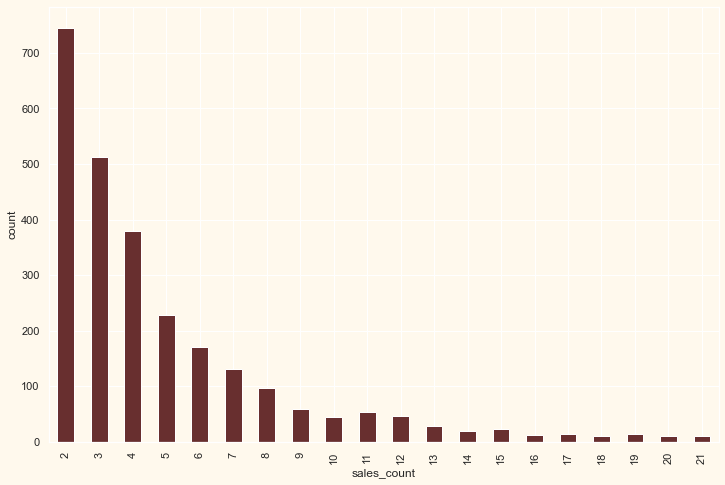

In [37]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(
    kind='bar', 
    color="#682F2F",
    figsize=(12,8), 
    grid=True
)

ax.set_ylabel('count')




Text(0, 0.5, 'count')

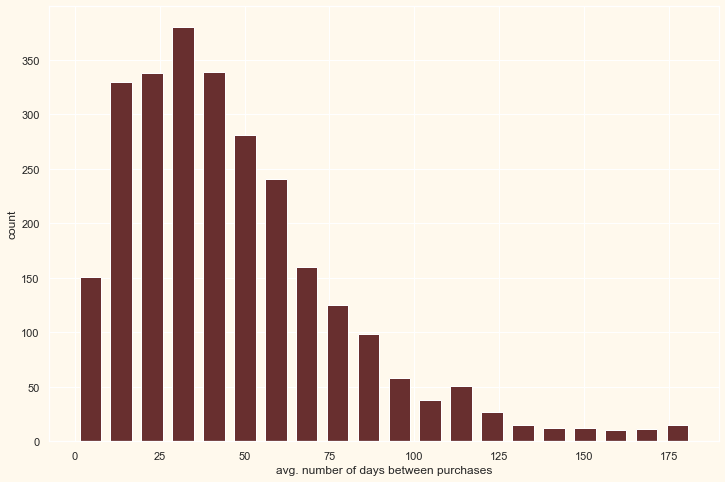

In [38]:
ax = summary_df['invoicedate_purchase_frequency'].hist(
    bins=20,
    color="#682F2F",
    rwidth=0.7,
    figsize=(12,8)
)

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

 

# 4. Predicting 3-Month CLV

### 4.1 Data Prep

In [39]:
clv_freq = '3M'

In [40]:
data_df = orders_df.reset_index().groupby([
    'CustomerID',
    pd.Grouper(key='InvoiceDate',freq=clv_freq)
]).agg({
    'Sales': [sum, groupby_mean, groupby_count],
})

In [41]:
data_df.head(15)

Sales                 
                             sum        avg count
CustomerID InvoiceDate                           
12346.0    2011-03-31   77183.60  77183.600     1
12347.0    2010-12-31     711.79    711.790     1
           2011-03-31     475.39    475.390     1
           2011-06-30    1018.77    509.385     2
           2011-09-30     584.91    584.910     1
           2011-12-31    1294.32   1294.320     1
12348.0    2010-12-31     892.80    892.800     1
           2011-03-31     227.44    227.440     1
           2011-06-30     367.00    367.000     1
           2011-09-30     310.00    310.000     1
12349.0    2011-12-31    1757.55   1757.550     1
12350.0    2011-03-31     334.40    334.400     1
12352.0    2011-03-31    1561.81    312.362     5
           2011-09-30     632.50    316.250     2
           2011-12-31     311.73    311.730     1

In [42]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [43]:
data_df = data_df.reset_index()

In [44]:
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


In [45]:
data_df.columns

Index(['CustomerID', 'InvoiceDate', 'sales_sum', 'sales_avg', 'sales_count'], dtype='object')

In [46]:
date_month_map = {
    str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True)
    )
}

In [47]:
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])

In [48]:
date_month_map

{'2011-12-31': 'M_1',
 '2011-09-30': 'M_2',
 '2011-06-30': 'M_3',
 '2011-03-31': 'M_4',
 '2010-12-31': 'M_5'}

In [49]:
data_df.head(20)

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2
5,12347.0,2011-12-31,1294.32,1294.320,1,M_1
6,12348.0,2010-12-31,892.80,892.800,1,M_5
7,12348.0,2011-03-31,227.44,227.440,1,M_4
8,12348.0,2011-06-30,367.00,367.000,1,M_3
9,12348.0,2011-09-30,310.00,310.000,1,M_2


### Building Feature Set

In [50]:
features_df = pd.pivot_table(data_df,values=['sales_sum', 'sales_avg', 'sales_count'], 
    columns='M', 
    index='CustomerID'
)

In [51]:
features_df

sales_avg                                            sales_count  \
M                M_1         M_2      M_3           M_4     M_5         M_1   
CustomerID                                                                    
12346.0          NaN         NaN      NaN  77183.600000     NaN         NaN   
12347.0     1294.320  584.910000  509.385    475.390000  711.79         1.0   
12348.0          NaN  310.000000  367.000    227.440000  892.80         NaN   
12349.0     1757.550         NaN      NaN           NaN     NaN         1.0   
12350.0          NaN         NaN      NaN    334.400000     NaN         NaN   
...              ...         ...      ...           ...     ...         ...   
18280.0          NaN         NaN      NaN    180.600000     NaN         NaN   
18281.0          NaN         NaN   80.820           NaN     NaN         NaN   
18282.0          NaN  100.210000      NaN           NaN     NaN         NaN   
18283.0      153.242   92.696667  131.170    105.966667     NaN         5.0   
18287.0      536.000         NaN  765.280           NaN     NaN         2.0   

                               sales_sum                                     
M           M_2  M_3  M_4  M_5       M_1     M_2      M_3       M_4     M_5  
CustomerID                                                                   
12346.0     NaN  NaN  1.0  NaN       NaN     NaN      NaN  77183.60     NaN  
12347.0     1.0  2.0  1.0  1.0   1294.32  584.91  1018.77    475.39  711.79  
12348.0     1.0  1.0  1.0  1.0       NaN  310.00   367.00    227.44  892.80  
12349.0     NaN  NaN  NaN  NaN   1757.55     NaN      NaN       NaN     NaN  
12350.0     NaN  NaN  1.0  NaN       NaN     NaN      NaN    334.40     NaN  
...         ...  ...  ...  ...       ...     ...      ...       ...     ...  
18280.0     NaN  NaN  1.0  NaN       NaN     NaN      NaN    180.60     NaN  
18281.0     NaN  1.0  NaN  NaN       NaN     NaN    80.82       NaN     NaN  
18282.0     1.0  NaN  NaN  NaN       NaN  100.21      NaN       NaN     NaN  
18283.0     3.0  4.0  3.0  NaN    766.21  278.09   524.68    317.90     NaN  
18287.0     NaN  1.0  NaN  NaN   1072.00     NaN   765.28       NaN     NaN  

[4298 rows x 15 columns]

In [52]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [53]:
features_df = features_df.fillna(0)

In [54]:
features_df.shape

(4298, 15)

In [55]:
features_df

,sales_avg_M_1,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_1,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_1,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,,,,
12346.0,0.000,0.000000,0.000,77183.600000,0.00,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,77183.60,0.00
12347.0,1294.320,584.910000,509.385,475.390000,711.79,1.0,1.0,2.0,1.0,1.0,1294.32,584.91,1018.77,475.39,711.79
12348.0,0.000,310.000000,367.000,227.440000,892.80,0.0,1.0,1.0,1.0,1.0,0.00,310.00,367.00,227.44,892.80
12349.0,1757.550,0.000000,0.000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,1757.55,0.00,0.00,0.00,0.00
12350.0,0.000,0.000000,0.000,334.400000,0.00,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,334.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.000,0.000000,0.000,180.600000,0.00,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,180.60,0.00
18281.0,0.000,0.000000,80.820,0.000000,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.00,80.82,0.00,0.00
18282.0,0.000,100.210000,0.000,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.00,100.21,0.00,0.00,0.00


In [56]:
response = 'sales_sum_M_1'

In [57]:
drop = ['sales_avg_M_1','sales_count_M_1','sales_sum_M_1']

In [58]:
all_features = [x for x in features_df.columns if x not in drop]

In [59]:
sample_df = features_df[all_features + [response]]

In [60]:
sample_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,sales_sum_M_1
CustomerID,,,,,,,,,,,,,
12346.0,0.00,0.000,77183.60,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
12347.0,584.91,509.385,475.39,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
12348.0,310.00,367.000,227.44,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
12349.0,0.00,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1757.55
12350.0,0.00,0.000,334.40,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00


### 4.2. Regression Model

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(features_df[all_features], features_df[response], test_size=0.3)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg_fit = LinearRegression()

In [65]:
reg_fit.fit(x_train, y_train)

LinearRegression()

In [66]:
reg_fit.intercept_

168.01455191580203

In [67]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef


,feature,coef
0,sales_avg_M_2,0.260501
1,sales_avg_M_3,-0.565191
2,sales_avg_M_4,-0.173141
3,sales_avg_M_5,-0.504325
4,sales_count_M_2,86.362514
5,sales_count_M_3,-5.083924
6,sales_count_M_4,-100.184700
7,sales_count_M_5,-42.097141
8,sales_sum_M_2,0.223928
9,sales_sum_M_3,0.401736


In [68]:
from sklearn.metrics import r2_score, median_absolute_error

In [69]:
train_preds =  reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [70]:

print('In-Sample R-Squared: %0.4f' % r2_score(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true=y_test, y_pred=test_preds))


In-Sample R-Squared: 0.7191
Out-of-Sample R-Squared: 0.5734


In [71]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true=y_test, y_pred=test_preds))


In-Sample MSE: 230.6320
Out-of-Sample MSE: 214.0489


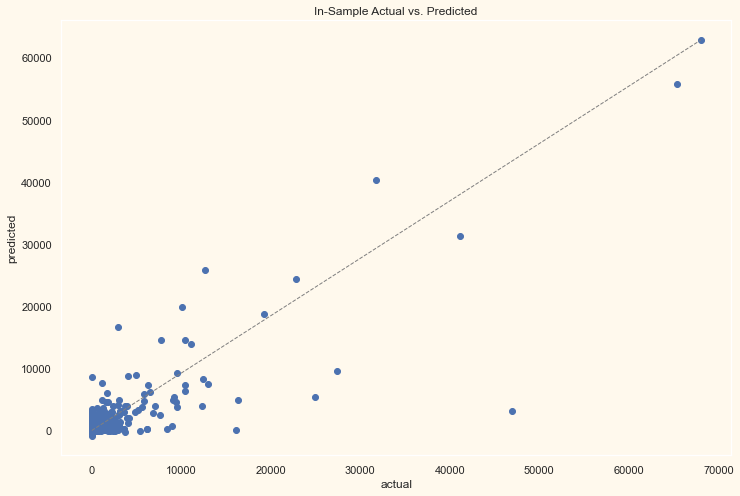

In [72]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()



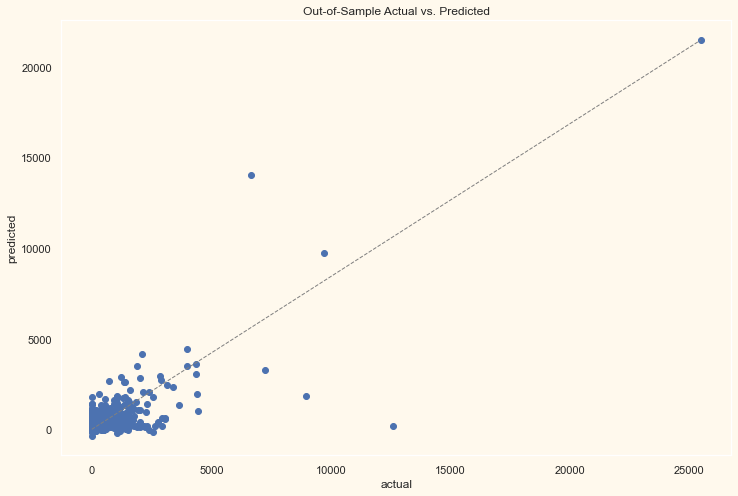

In [73]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()